In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

## Loading dataset



In [ ]:
data_url = 'https://raw.githubusercontent.com/arthuraaL/100-Days-of-ML-Code/main/Data/diabetes.csv'
df_train = pd.read_csv(data_url)

## Data analysis

In [ ]:
# view the dimensions of the data
df_train.shape

(768, 9)

In [ ]:
# preview the dataset
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# summary of the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df_train.describe()

# There's no missing value, as we can check in count row

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df_train['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Handling missing data

We can confirme that there are no missing values in the dataset.

In [ ]:
print(f'Is missing values in the training data? {df_train.isnull().sum().values.any()}')

Is missing values in the training data? False


## Feature selection

In [ ]:
features = list(df_train.drop(columns='Outcome'))

X = df_train[features]
y = df_train.Outcome

## Splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [ ]:
# dimensions of the dataset after splitting
print(f'X train has shape: {X_train.shape}')
print(f'y train has shape: {y_train.shape}')
print(f'X test has shape: {X_test.shape}')
print(f'y test has shape: {y_test.shape}')

X train has shape: (537, 8)
y train has shape: (537,)
X test has shape: (231, 8)
y test has shape: (231,)


In [ ]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
590,11,111,84,40,0,46.8,0.925,45
692,2,121,70,32,95,39.1,0.886,23
492,4,99,68,38,0,32.8,0.145,33
205,5,111,72,28,0,23.9,0.407,27
709,2,93,64,32,160,38.0,0.674,23


## Decision tree classifier

Let's build a Decision Tree model using [gini index](https://bambielli.com/til/2017-10-29-gini-impurity/#:~:text=Gini%20Impurity%20is%20a%20measurement,labels%20from%20the%20data%20set.) as the criterion.

In [ ]:
# Create an object
clf = DecisionTreeClassifier(criterion='gini', random_state=1)

# Train the modelimport graphviz 
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

## Evaluating the model


In [ ]:
print(f'Accuracy using gini-index: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy using gini-index: 0.7142857142857143


## Checking for overfitting/underfitting

In [ ]:
print(f'Training score: {clf.score(X_train, y_train)}')
print(f'Test score: {clf.score(X_test, y_test)}')

Training score: 1.0
Test score: 0.7142857142857143


## Visualizing Decision Trees

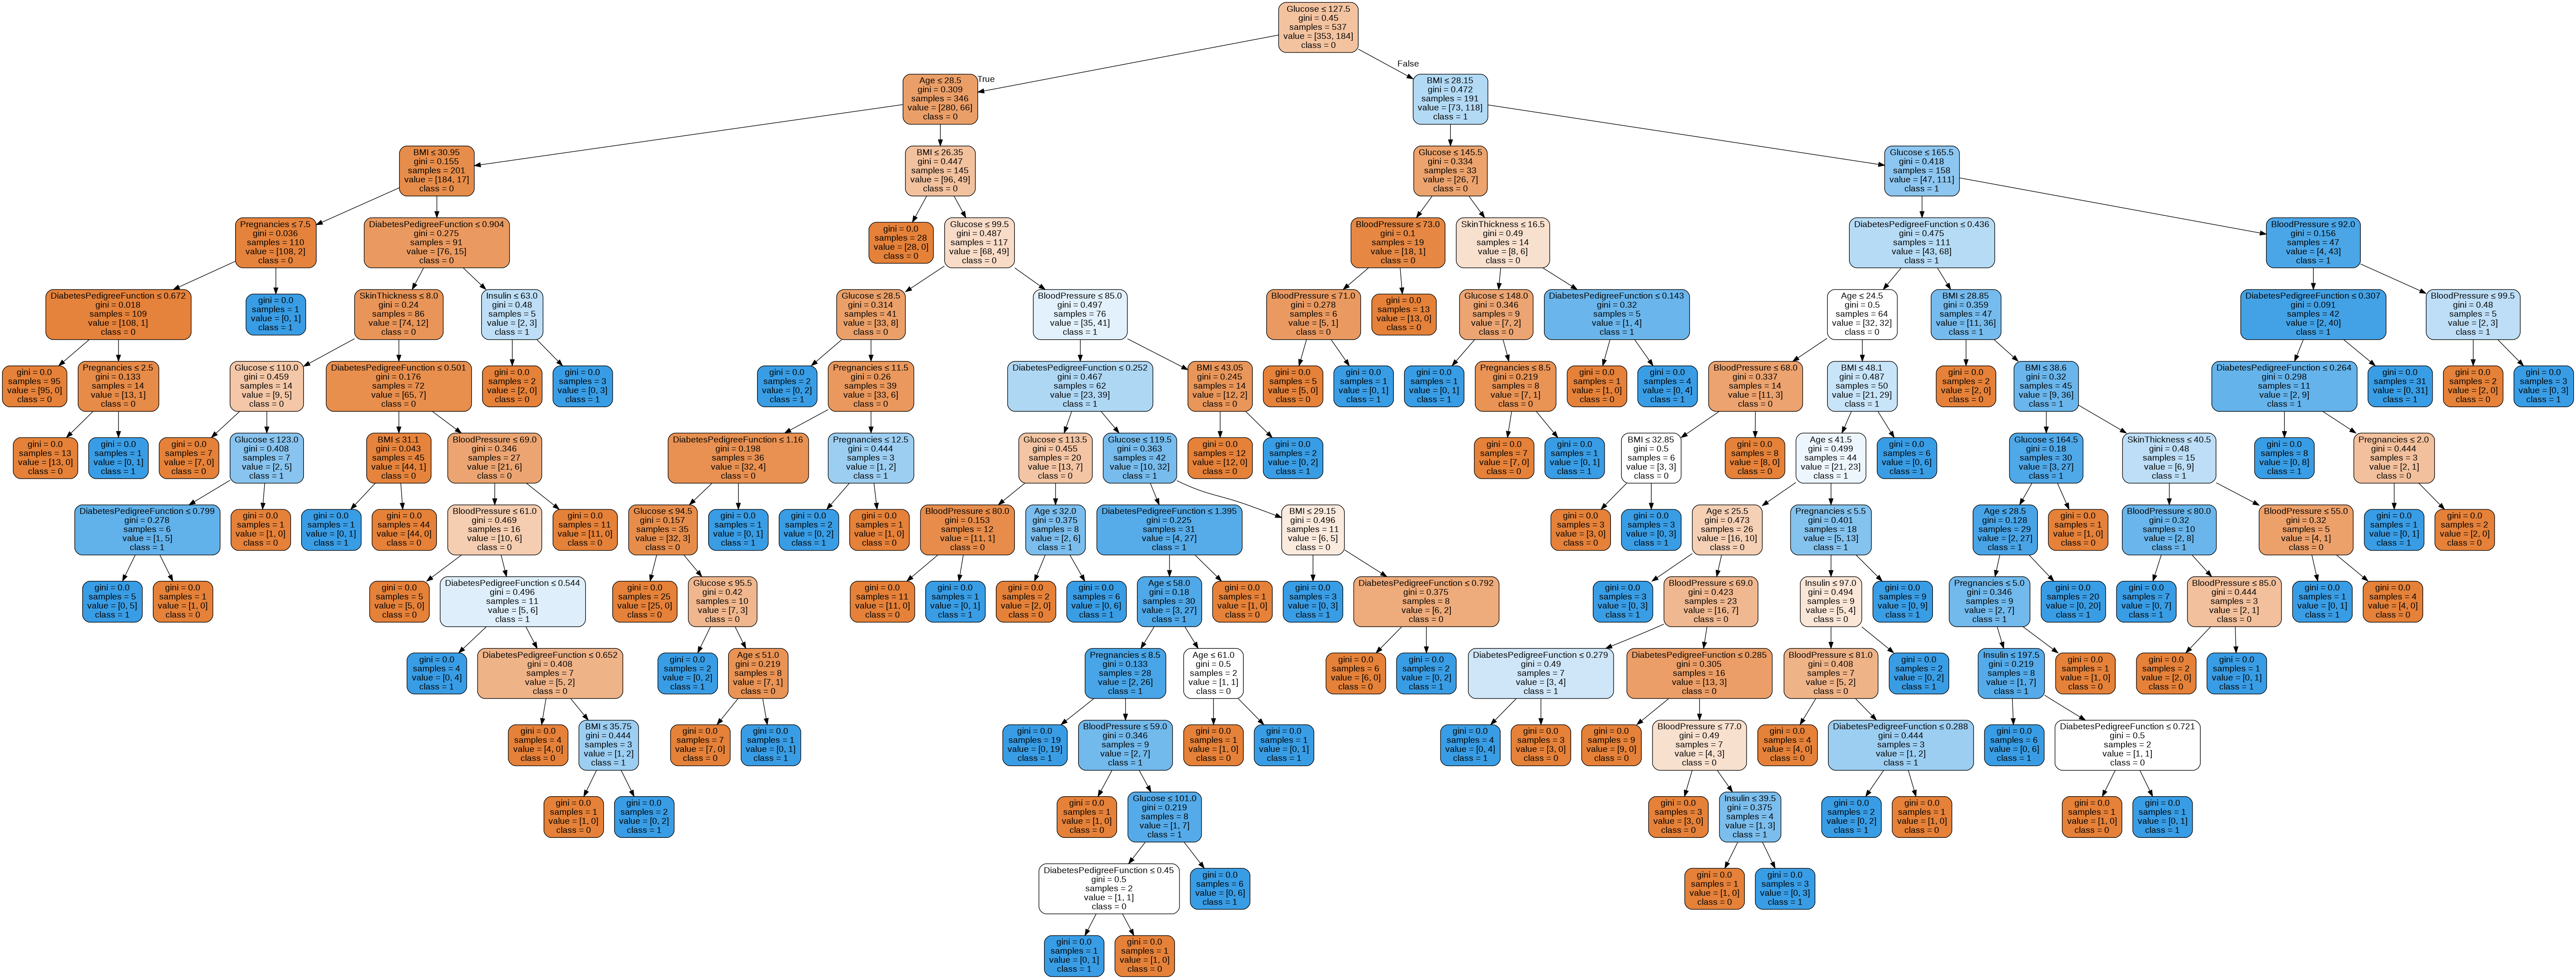

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, 
                special_characters=True, feature_names = features,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

This decision tree is unpruned (lots of branches ). The model performed well on the training data but is not generalizing so well for unseen data, also called overfitting. Pruning techniques help to avoid overfitting. If some branches are not contributing to the model, we can snip them off. The new decision tree might perform worse on the training set, on the other hand, it generalizes better to the test data. Two possible pruning techniques are:

* Pre-pruning - Early stopping
We can grid search those parameters and choose the optimal values that give better performance on test data.

* Post-pruning - 
I will review these techniquies later.

## Pruning Decision Tree

In [ ]:
# pre-pruning
# grid search (https://scikit-learn.org/stable/modules/grid_search.html#grid-search)

param_grid = {'max_depth': [2,3,4,5,6,7,8],
              'min_samples_split': [2,3,4,5,6],
              'min_samples_leaf': [1,2,3,4]}

tree = DecisionTreeClassifier(random_state=1)
clf = GridSearchCV(tree, param_grid)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
    

In [ ]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
model = clf.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Accuracy using gini-index: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy using gini-index: 0.7402597402597403


In [ ]:
print(f'Accuracy on train set: {model.score(X_train, y_train)}')
print(f'Accuracy on test set: {model.score(X_test, y_test)}')

Accuracy on train set: 0.776536312849162
Accuracy on test set: 0.7402597402597403
